In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
rows,col=data.shape

In [11]:
print('Nombre colonnes :',col)
print('Nombre Lignes :',rows)


Nombre colonnes : 8
Nombre Lignes : 1000


In [12]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [19]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [22]:
data.replace("none", np.nan, inplace=True)

In [24]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,NaN,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,NaN,90,95,93
3,male,group A,associate's degree,free/reduced,NaN,47,57,44
4,male,group C,some college,standard,NaN,76,78,75


In [25]:
data.isnull().sum()

gender                           0
race/ethnicity                   0
parental level of education      0
lunch                            0
test preparation course        642
math score                       0
reading score                    0
writing score                    0
dtype: int64

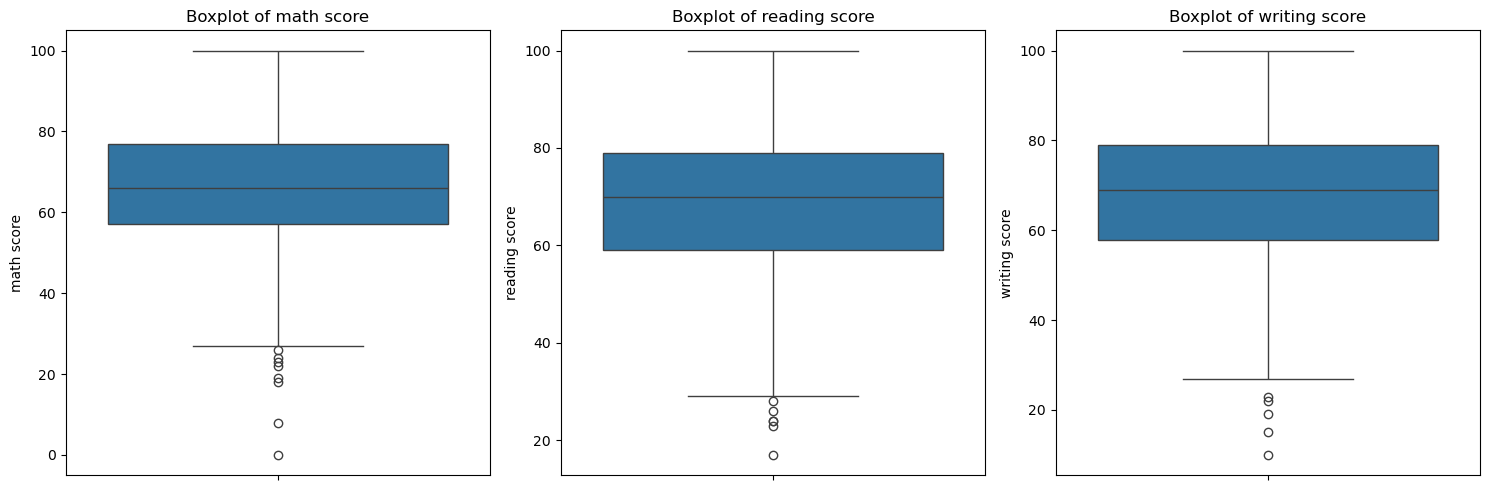

In [38]:
numerical_cols = ['math score', 'reading score', 'writing score']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


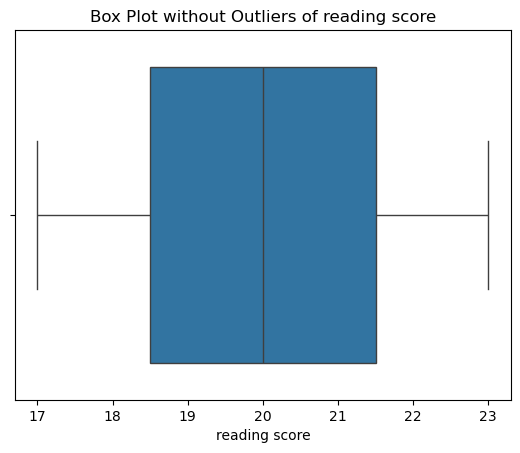

In [44]:
#colonne reading score
def removal_box_plot(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]
    sns.boxplot(x=removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
threshold_value = 23
df_cleaned = removal_box_plot(data, 'reading score', threshold_value)

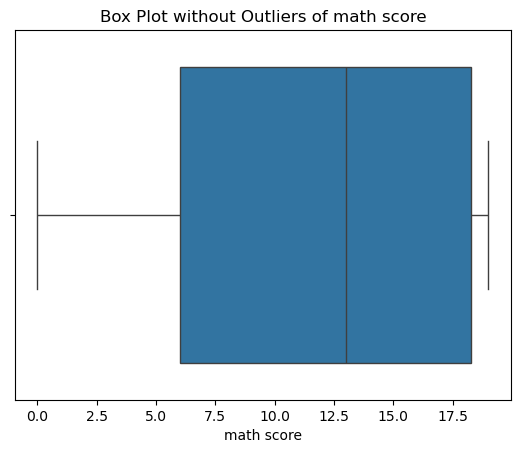

In [46]:
#colonne math score
def removal_box_plot(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]
    sns.boxplot(x=removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
threshold_value = 20
df_cleaned = removal_box_plot(data, 'math score', threshold_value)

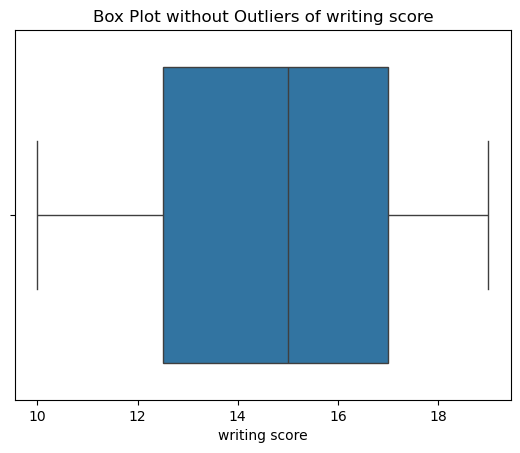

In [47]:
#colonne writing score
def removal_box_plot(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]
    sns.boxplot(x=removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
threshold_value = 21
df_cleaned = removal_box_plot(data, 'writing score', threshold_value)

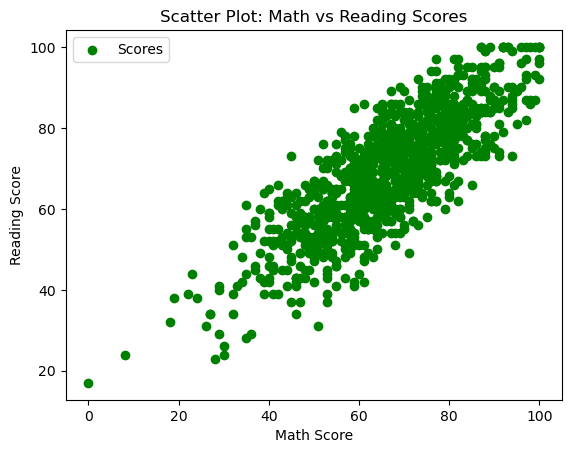

In [53]:
plt.scatter(data['math score'], data['reading score'], color='green', label='Scores')

plt.title('Scatter Plot: Math vs Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend()


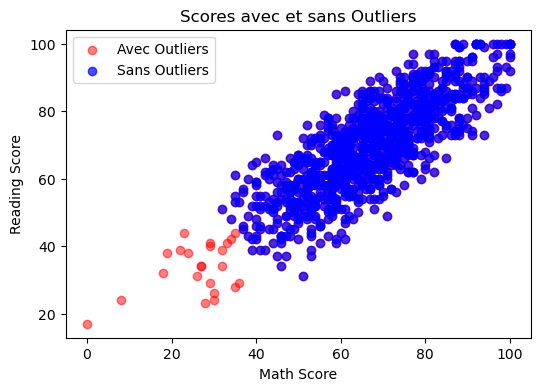

In [59]:
import numpy as np
import matplotlib.pyplot as plt

outlier_indices = np.where((data['math score'] < 38) & (data['reading score'] < 45))

no_outliers = data.drop(outlier_indices[0])

fig, ax = plt.subplots(figsize=(6, 4))

# Tracer les scores de mathématiques avant et après suppression des outliers
ax.scatter(data['math score'], data['reading score'], color='red', alpha=0.5, label='Avec Outliers')
ax.scatter(no_outliers['math score'], no_outliers['reading score'], color='blue', alpha=0.7, label='Sans Outliers')

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')
ax.set_title('Scores avec et sans Outliers')
ax.legend()


In [60]:
target_variables = ['math score', 'reading score', 'writing score']
print(f"Le dataset contient {len(target_variables)} variables cibles.")


Le dataset contient 3 variables cibles.


<Axes: >

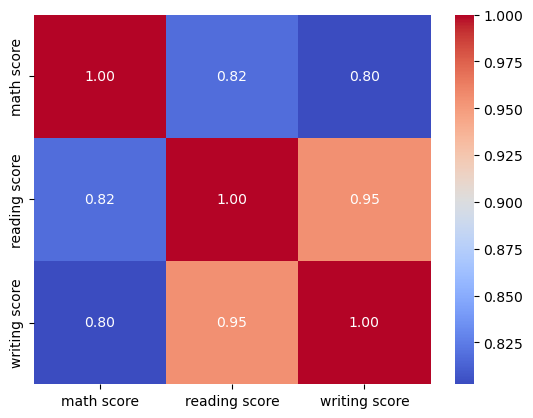

In [62]:
score= data[['math score', 'reading score', 'writing score']]
score.head()
correlation=score.corr()
sns.heatmap(correlation,annot= True, fmt= '.2f', cmap='coolwarm')

In [63]:
# #Analysis of the Correlation Heatmap:
# #High Correlations Between Variables:

# #math score vs. reading score: Correlation coefficient = 0.82. This indicates a strong positive relationship between math scores and reading scores. Students who perform well in math also tend to perform well in reading.
# reading score vs. writing score: Correlation coefficient = 0.95. This shows a very strong positive correlation. It suggests that reading and writing skills are closely related, as expected.
# math score vs. writing score: Correlation coefficient = 0.80. This indicates a strong positive relationship between math and writing scores, though it's slightly weaker than the relationship between reading and writing.
# Diagonal Values:

# The diagonal values (1.00) represent the perfect correlation of a variable with itself.
# Interpretation:

# The high correlation between reading and writing scores (0.95) may suggest redundancy. If both variables convey almost the same information, one might be dropped in certain machine learning models to reduce dimensionality and avoid multicollinearity.
# Significance:

# These relationships indicate that skills in different subjects (math, reading, writing) are interdependent to some extent, possibly due to cognitive abilities or study habits.
# What Should Be Done?
# For Feature Selection:
# Evaluate whether both reading score and writing score are necessary for downstream tasks like predictive modeling. If they add redundant information, consider removing one.
# For Data Exploration:
# Explore why certain pairs of scores are so highly correlated. This could involve examining teaching methods or shared competencies among students.
# For Predictive Models:
# Monitor multicollinearity (using Variance Inflation Factor, for example) in models that are sensitive to correlated features, such as linear regression.

In [64]:
# Résumé :
# Corrélations fortes :

# Reading vs Writing (0.95) : Très fortement liés, indiquant que ces compétences sont interdépendantes.
# Math vs Reading/Writing (0.82 et 0.80) : Forte corrélation, suggérant que les performances en mathématiques influencent celles en lecture/écriture.
# Signification :

# Les compétences académiques sont interdépendantes.
# La forte redondance entre reading score et writing score pourrait nécessiter l’élimination de l’une des deux pour éviter la multicollinearité dans les modèles.
# Action :

# Réduire la dimensionnalité en supprimant des variables fortement redondantes si nécessaire pour les modèles prédictifs.

In [78]:
data['mean score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)
data=data.drop(['math score', 'reading score', 'writing score'],axis=1)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [84]:
grouped_data = data.groupby('gender')['mean score'].mean()
print(grouped_data)

gender
female    69.569498
male      65.837483
Name: mean score, dtype: float64


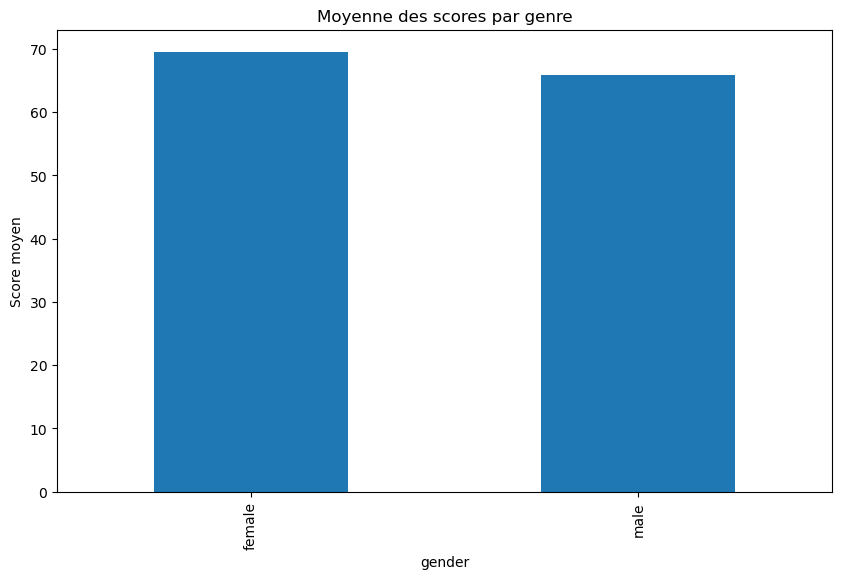

In [85]:
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Moyenne des scores par genre')
plt.ylabel('Score moyen')
plt.show()


In [5]:
data['mean score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)

data['mean score'].describe()


count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: mean score, dtype: float64

Text(0.5, 1.0, 'Distribution of Mean')

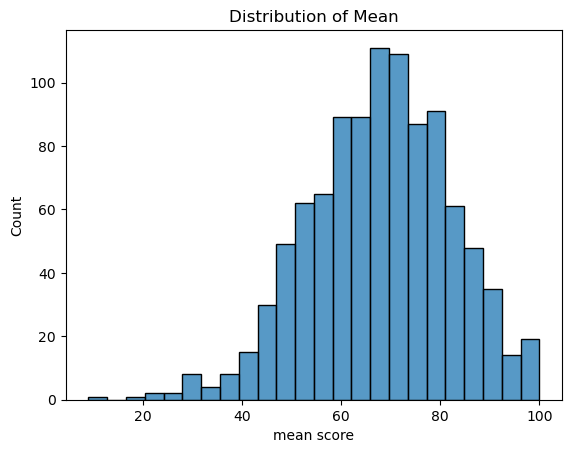

In [9]:
import seaborn as sns 
sns.histplot(data['mean score'])
plt.title('Distribution of Mean')


In [10]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [59]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
ohe = OneHotEncoder(sparse_output= False)

In [31]:
ohe.fit_transform(data[['gender']])[0:5]
print(ohe.get_feature_names_out(['gender']))


['gender_female' 'gender_male']


In [20]:
ohe.categories_

[array(['female', 'male'], dtype=object)]

In [32]:
gender_encod_dense = ohe.fit_transform(data[['gender']]).toarray()
gender_encod_data = pd.DataFrame(gender_encod_dense, columns=ohe.get_feature_names_out(['gender']))
data = pd.concat([data, gender_encod_data], axis=1)

print(data.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   mean score  gender_female  gender_male  
0   72.666667            1.0          0.0  
1   82.333333            1.0          0.0  
2   92.666667       

In [33]:
pd.get_dummies(data['gender']).head()

,female,male
0,True,False
1,True,False
2,True,False
3,False,True
4,False,True


In [34]:
print(data['parental level of education'].unique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [35]:
education_categories = ['some high school', 'high school', 'some college', 
                        "associate's degree", "bachelor's degree", "master's degree"]


In [37]:
oe=OrdinalEncoder(categories=[education_categories])

In [38]:
oe.fit_transform(data[['parental level of education']])[:5]

array([[4.],
       [2.],
       [5.],
       [3.],
       [2.]])

In [39]:
data['parental level of education'].head()

0     bachelor's degree
1          some college
2       master's degree
3    associate's degree
4          some college
Name: parental level of education, dtype: object

In [45]:
data['education_level_encoded'] = oe.fit_transform(data[['parental level of education']])

data[['parental level of education', 'education_level_encoded']].head()


,parental level of education,education_level_encoded
0,bachelor's degree,4.0
1,some college,2.0
2,master's degree,5.0
3,associate's degree,3.0
4,some college,2.0


In [ ]:
#pandas map method
data['education_level_encoded'].map({"bachelor's degree":4,
                                     'some college':2,
                                     "master's degree" :5,
                                     "associate's degree":3,
                                     'high school':1,
                                     'some high school': 0 
}).head()

In [48]:
#Get predictor variables and target variable from data
X=data.drop('mean score', axis=1)
Y=data['mean score']

In [57]:
#Make column transformer wich consist of OneHotEncoder and OrdinalEncoder
from sklearn.compose import make_column_transformer
column_transform=make_column_transformer(
    (ohe,['gender','race/ethnicity','lunch','test preparation course']),
    (oe,['parental level of education'])
)

In [58]:
column_transform.fit_transform(X)[:5]

array([[1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 4.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 2.],
       [1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 5.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 3.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 2.]])